# BANK MARKETING DECISION TREE CLASSIFIER 

## Import

### Import libraries 

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Import data

In [132]:
df = pd.read_csv(r"C:\Users\Administrator\Downloads\Bank Marketing Dataset\bank.csv")

In [157]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,0,unknown,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,0,unknown,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,0,unknown,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,0,unknown,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,0,unknown,yes


## EDA

There are no missing values nor duplicates in the data. Lets explore more. 

In [147]:
df.duplicated().sum()

0

In [156]:
df.isnull().any().sum()

0

### Categorical Data

Lets commence with categorical data. For such data, the unique values are determined as below. There are 12 unique job types and 12 months in a year. A print out of the unique values further shows how data is made up.

In [134]:
df.select_dtypes("object").nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
deposit       2
dtype: int64

In [135]:
for col in df.select_dtypes("object").columns:
    print(col)
    print(df[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


A plot of the distribution of the target shows the data is balanced

<Axes: title={'center': 'Distribution of Depositers'}, xlabel='deposit', ylabel='count'>

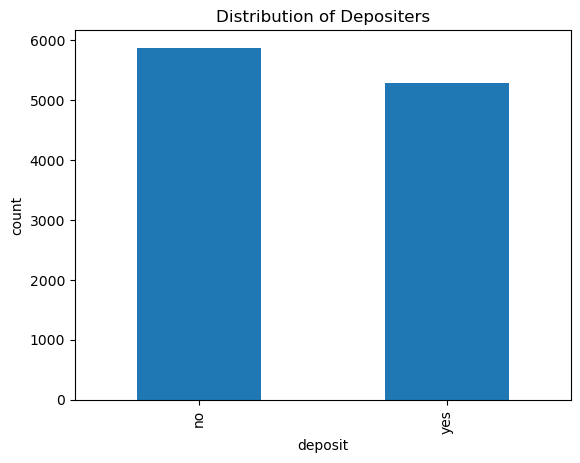

In [136]:
df["deposit"].value_counts().plot(
    kind="bar",
    xlabel="deposit",
    ylabel="count",
    title="Distribution of Depositers"
)

Default feature do not provide any meaningul information or trend as those on either side of default status subscribed or did not subscribe to the deposit product. Hence the feature will be dropped. 

In [137]:
df.groupby(["deposit", "default"]).size()

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

Majority of respondents (in fact 40%+) had not been contacted for the campaign previously hence we can drop the pday feature. 

In [138]:
df.groupby(["deposit", "pdays"]).size()

deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

In [ ]:
df.drop(columns=["default", "pdays"], inplace=True)

### Numerical Data

For numerical variables, the decribe function shows a quick overview of the empirical characteristics of the data. For example, the average age is 41, the youngest study subject is 18 while the oldest is 95 years. The mean bank balance of the population is 1528 with some having negative balances and some having as high as 81,000 in the bank. Such information provide a basic understanding of who is likely to purchase the product or service. 

In [140]:
df.describe()

,age,balance,day,duration,campaign,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,58.000000


Upto this point, our data is clean, so we head straight to splitting it 

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   balance    11162 non-null  int64 
 5   housing    11162 non-null  object
 6   loan       11162 non-null  object
 7   contact    11162 non-null  object
 8   day        11162 non-null  int64 
 9   month      11162 non-null  object
 10  duration   11162 non-null  int64 
 11  campaign   11162 non-null  int64 
 12  previous   11162 non-null  int64 
 13  poutcome   11162 non-null  object
 14  deposit    11162 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.3+ MB


A vertical split divides the data into target y and features X. 

### Feature Engineering

In [159]:
target = "deposit"
y = df[target]
X = df.drop(columns= target)

In [160]:
y.head()

0    yes
1    yes
2    yes
3    yes
4    yes
Name: deposit, dtype: object

In [161]:
X.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,0,unknown
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,0,unknown
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,0,unknown
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,0,unknown
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,0,unknown


Using the train-test-split functionality, we divide our data into training set, validation set, and testing set. 
Since we dont want to have a look at the testing data before we subject our mode to the testing process itself, we use the training set to train the model and validation set for tunning the parameters in a process known as 
hyperparameter tunning

In [15]:
from sklearn.model_selection import train_test_split

In [163]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"The shape of 'X_train' is {X_train.shape}.")
print(f"The shape of 'X_test' is {X_test.shape}.")
print(f"The shape of 'y_train' is {y_train.shape}.")
print(f"The shape of 'y_test' is {y_test.shape}.")

The shape of 'X_train' is (8929, 14).
The shape of 'X_test' is (2233, 14).
The shape of 'y_train' is (8929,).
The shape of 'y_test' is (2233,).


Further, we divide X_train and y_train into training and validation sets using randomized train-test-split to have a validation data that is 20% of the total data. 

In [164]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)
print(f"The shape of 'X_train' is {X_train.shape}.")
print(f"The shape of 'X_val' is {X_val.shape}.")
print(f"The shape of 'y_train' is {y_train.shape}.")
print(f"The shape of 'y_val' is {y_val.shape}.")

The shape of 'X_train' is (7143, 14).
The shape of 'X_val' is (1786, 14).
The shape of 'y_train' is (7143,).
The shape of 'y_val' is (1786,).


What is the baseline of the model?

In [165]:
baseline= y_train.value_counts(normalize=True).max()
print("Baseline", round(baseline, 2))

Baseline 0.53


## Model Building

Next, we make a pipeline that contains a transformer and a predictor to build the model. The transformer is ordinal encoding and the transformer is the decision tree classifier. We then fit the model to the training data. 

In [30]:
from category_encoders import OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [180]:
model = make_pipeline(
    OrdinalEncoder(), DecisionTreeClassifier(max_depth=7, random_state=42)
)
model.fit(X_train, y_train)                                   

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['job', 'marital', 'education', 'housing',
                                      'loan', 'contact', 'month', 'poutcome'],
                                mapping=[{'col': 'job', 'data_type': dtype('O'),
                                          'mapping': retired           1
technician        2
housemaid         3
blue-collar       4
management        5
unknown           6
self-employed     7
admin.            8
student           9
services         10
entrepreneur     11
unemployed       12
NaN              -2
dtype: int64},
                                         {'col': 'marital',
                                          'data...
                                          'mapping': cellular     1
unknown      2
telephone    3
NaN         -2
dtype: int64},
                                         {'col': 'month',
                                          'data_type': dtype('O'),
                                          'mapping': may     1
nov     2
apr     3
sep     4
jan     5
mar     6
jul     7
jun     8
oct     9
aug    10
feb    11
dec    12
NaN    -2
dtype: int64},
                                         {'col': 'poutcome',
                                          'data_type': dtype('O'),
                                          'mapping': failure    1
success    2
other      3
unknown    4
NaN       -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=7, random_state=42))])

Its time to evaluate the model to determine its performance. 


### Evaluate

In [167]:
from sklearn.metrics import accuracy_score

In [168]:
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_val = accuracy_score(y_val, model.predict(X_val))
print("Training Accuracy", accuracy_train)
print("Test Accuracy", accuracy_val)

Training Accuracy 1.0
Test Accuracy 0.77491601343785


The problem with our model is the high accuracy of the training set relative to the test set. Actually, our model achieved an accuracy of 100% for the training set but 77% for the test set. Thus, lets get the depth of the tree to understand more. 

### Hyperparameter Tunning

In [169]:
decision_tree_depth = model.named_steps["decisiontreeclassifier"].get_depth()
print("Decision tree depth", decision_tree_depth)

Decision tree depth 24


We get a tree depth of 24. This might be too much flexibility and hence over fitting for the model. So lets determine the optimum tree depth. 

In [170]:
depth_hyperparams = range(1, 25, 2)

So we need to retrain our model with the values of the range defined above, i.e from 1 to 25 at a steps of 2. Everytime the model train, it calculates the training and validation accuracy and appends it to a list. 

For this, we need a loop and we will use a for loop


In [171]:
training_acc  = []
validation_acc = []

for d in depth_hyperparams:
    test_model = make_pipeline(
        OrdinalEncoder(), 
        DecisionTreeClassifier(max_depth = d, random_state=42)
    )
    test_model.fit(X_train, y_train)
    training_acc.append(test_model.score(X_train, y_train))
    validation_acc.append(test_model.score(X_val, y_val))
print("Training Accuracy Results", training_acc[:4])
print("Validation Accuracy Results", validation_acc[:4])
    

Training Accuracy Results [0.7111857762844743, 0.7746045079098418, 0.8014839703205936, 0.8398432031359373]
Validation Accuracy Results [0.7284434490481523, 0.7603583426651735, 0.7866741321388577, 0.816909294512878]


Once we have the accuracy scores for training and validation results, we need to explore to understand the best settings for our model. The best tool to visualize the results will be a chart. So we will plot the training and validation accuracies versus the depth of the decision tree. 
                                                                                                                        
                                                                                                                         

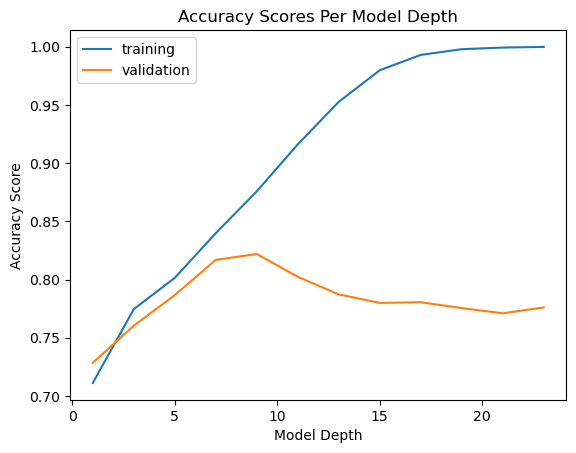

In [172]:
plt.plot(depth_hyperparams, training_acc, label = "training"),
plt.plot(depth_hyperparams, validation_acc, label = "validation")
plt.title("Accuracy Scores Per Model Depth")
plt.xlabel("Model Depth")
plt.ylabel("Accuracy Score")
plt.legend()

The optimum max depth is between 5 and 10, and approximately 7. Thus, we shall retrain the model once more by introducing the new max_depth argument in the decision tree classifier and calculating the resultant accuracy score. The results show a significant improvement between training and validation accuracies from [100 77] to [84 82]. Further, the test score evaluate to 80%. 


In [181]:
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_val = accuracy_score(y_val, model.predict(X_val))
print("Training Accuracy", round(accuracy_train, 2))
print("Validation Accuracy", round(accuracy_val, 2))

Training Accuracy 0.84
Validation Accuracy 0.82


In [182]:
acc = model.score(X_test, y_test)
print("Test Accuracy", round(acc, 2))

Test Accuracy 0.8


A plot of the decision tree classifier follows using the plot_tree fucntion

### Build Decision Tree

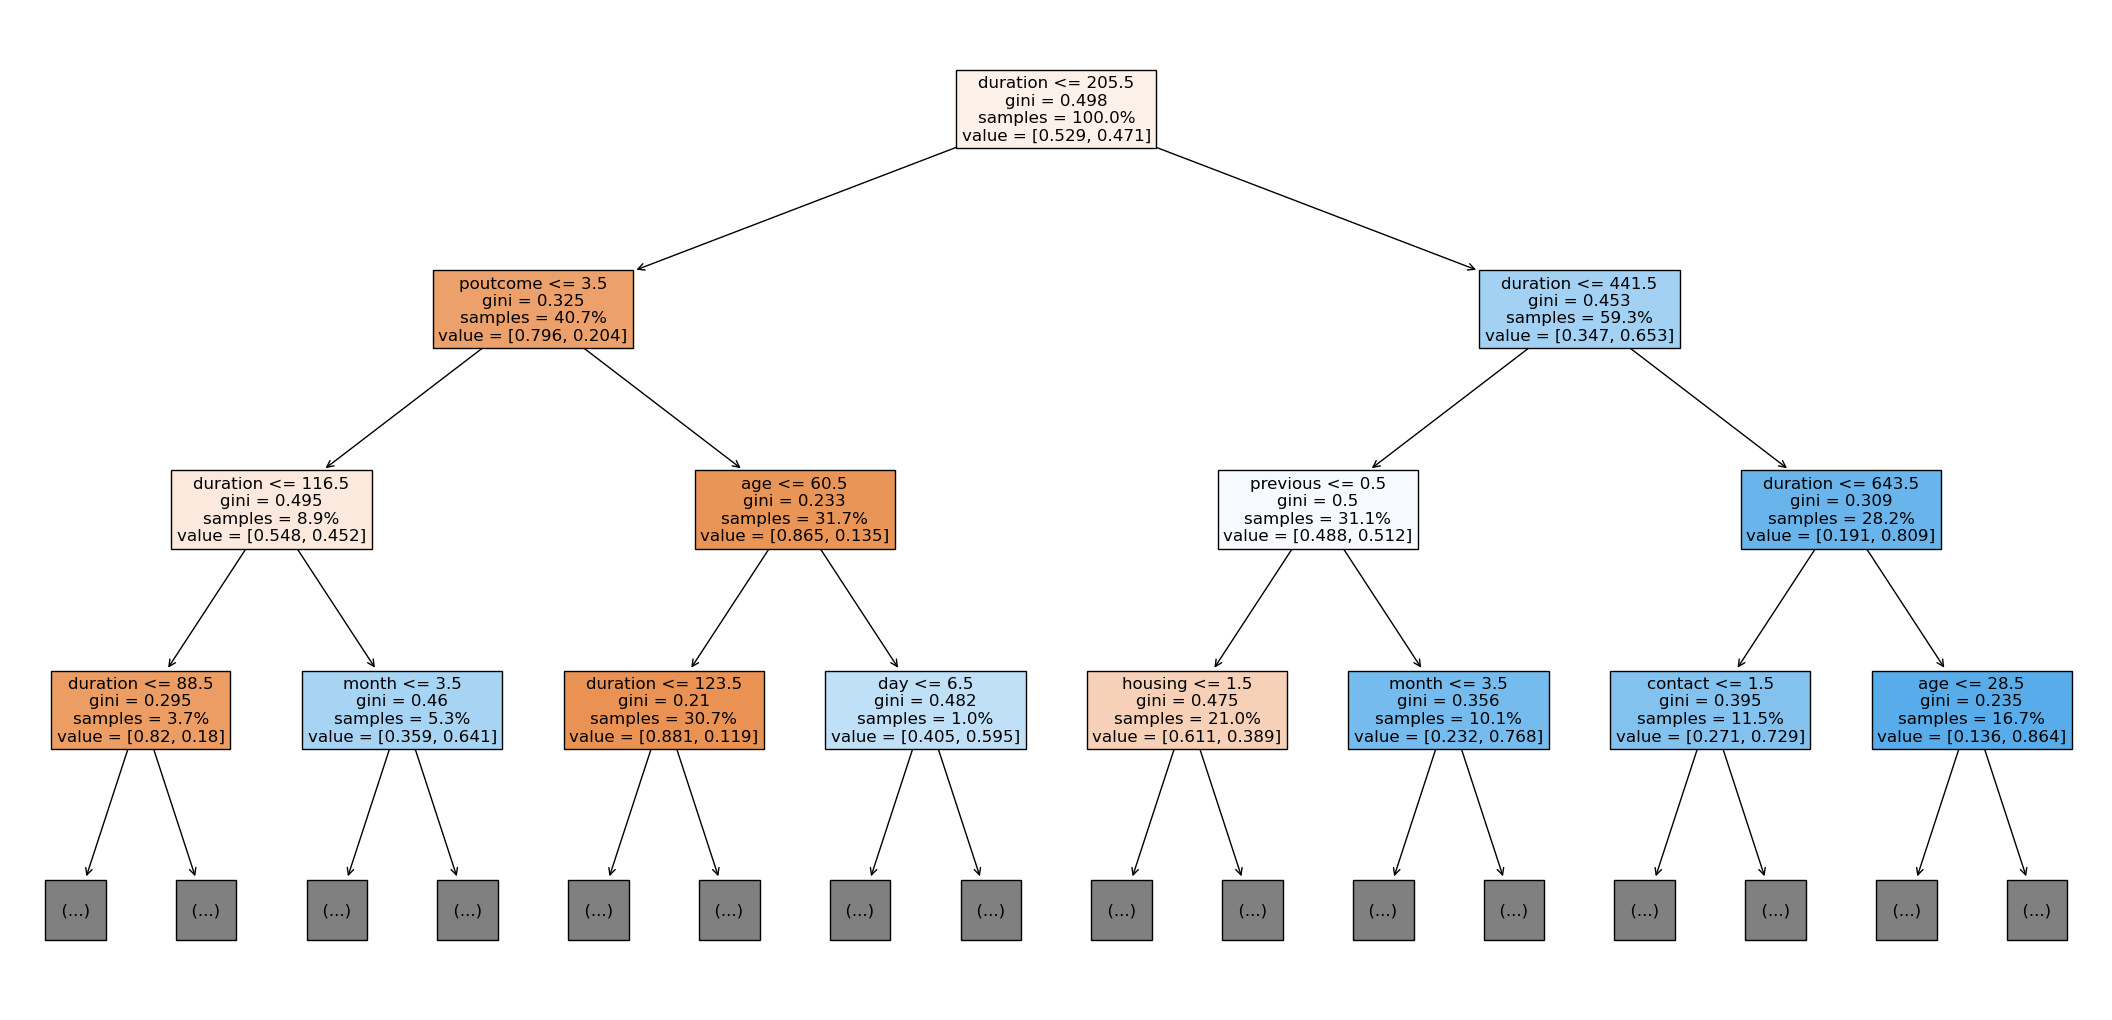

In [183]:
fig, ax = plt.subplots(figsize = (27, 13))
plot_tree(
    decision_tree = model.named_steps["decisiontreeclassifier"],
    feature_names = X_train.columns.to_list(),
    proportion=True,
    filled=True,
    fontsize=12,
    max_depth = 3,
    ax=ax
);

## Communicate Results

Last, we determine the feature importances and plot them in a barchart. First, we extract the features then the importances and put them all in a series. From the series, we then plot the chart.  

In [185]:
features = X_train.columns

In [186]:
importances = model.named_steps["decisiontreeclassifier"].feature_importances_
feat_imp = pd.Series(importances, index=features)
feat_imp.head()

age          0.061503
job          0.002569
marital      0.001960
education    0.002312
balance      0.023680
dtype: float64

Text(0.5, 1.0, 'Feature Importance Plot')

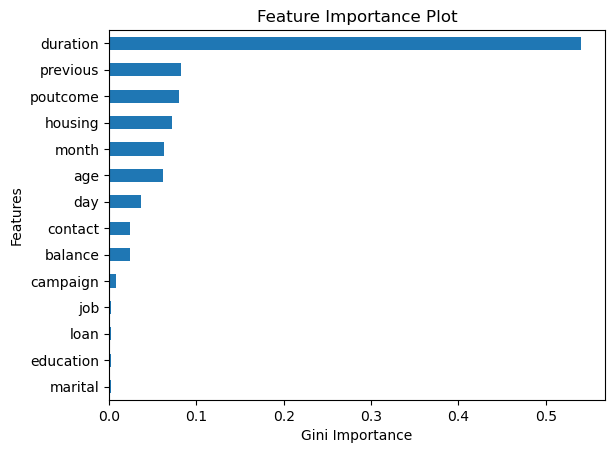

In [187]:
feat_imp.sort_values().plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")

The top 10 features predicted to determine the behavior of bank customers towards a product or service are as shown. The duration of contact between the bank and the customer is the leading factor. It then means that the more the bank talks with the customers about their products and services on offer, the more the product uptake. The second most important factor is the number of previous interactions between the bank and the customer. This feature points to the issue of loyalty on the part of the customer, and customer retention approaches on the part of the bank. Equally important is the outcome of previous campaigns categorized as unknown, failure, and success. This means previously successful customer base are receptive to new products and vice versa. For those that are undecided, the bank may need to provide more information in form of training and awareness etc. 